# California Housing data from 1990 US Census

In this lab we will rely on [Pandas](https://pandas.pydata.org/) and [Seaborn](http://seaborn.pydata.org/) to inspect and visualize data.


In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import jax.numpy as jnp
import jax

In [80]:
def jax_has_gpu():
    try:
        _ = jax.device_put(jax.numpy.ones(1), device=jax.devices("gpu")[0])
        return True
    except:
        return False

Load the dataset (if you are using Google Colab, it is already in the `sample_data` folder!).


In [81]:
data = pd.read_csv("california_housing_train.csv")

## Data inspection

Display some basic information.


In [82]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [84]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We are interested in predicting the field `median_house_value`. Plot its distribution.


/tmp/ipykernel_4966/886217475.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["median_house_value"])


<Axes: xlabel='median_house_value', ylabel='Density'>

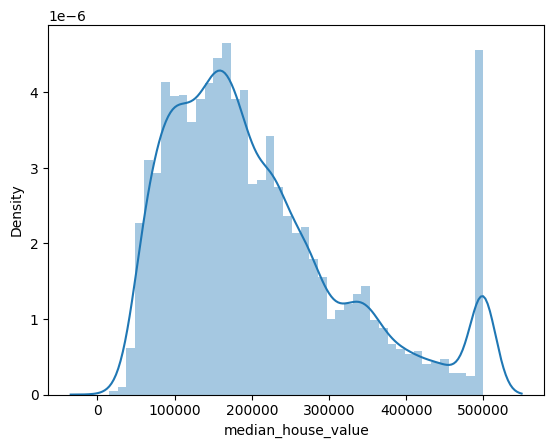

In [85]:
sns.distplot(data["median_house_value"])

It looks like the distribution tail has been truncated. Get rid of it to ease the prediction.


/tmp/ipykernel_4966/1889003861.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["median_house_value"])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16186 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16186 non-null  float64
 1   latitude            16186 non-null  float64
 2   housing_median_age  16186 non-null  float64
 3   total_rooms         16186 non-null  float64
 4   total_bedrooms      16186 non-null  float64
 5   population          16186 non-null  float64
 6   households          16186 non-null  float64
 7   median_income       16186 non-null  float64
 8   median_house_value  16186 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


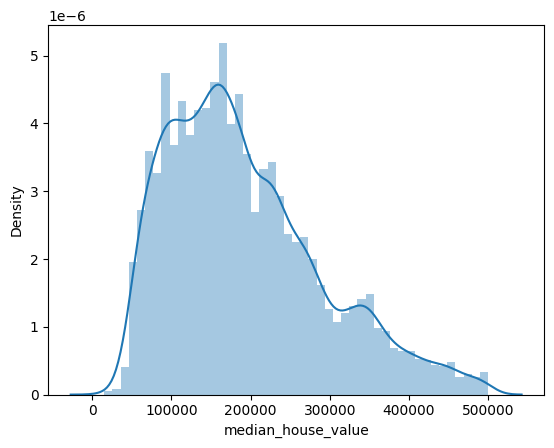

In [86]:
data = data[data["median_house_value"] < 500001]
sns.distplot(data["median_house_value"])
data.info()

Use a scatterplot to visualize the geograhical distribution of the houses.


<Axes: xlabel='longitude', ylabel='latitude'>

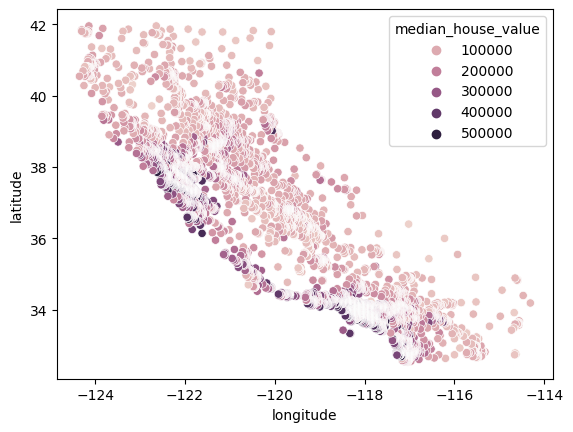

In [87]:
sns.scatterplot(data=data, x="longitude", y="latitude", hue="median_house_value")

Look for linear correlations among features.


In [88]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924703,-0.107711,0.046939,0.072053,0.103031,0.059998,-0.005244,-0.043938
latitude,-0.924703,1.000000,0.011156,-0.036351,-0.070561,-0.116039,-0.076807,-0.081594,-0.150570
housing_median_age,-0.107711,0.011156,1.000000,-0.371662,-0.326365,-0.294791,-0.308276,-0.192482,0.068057
total_rooms,0.046939,-0.036351,-0.371662,1.000000,0.932106,0.862707,0.921677,0.221613,0.141979
total_bedrooms,0.072053,-0.070561,-0.326365,0.932106,1.000000,0.882004,0.980512,0.016920,0.073765
population,0.103031,-0.116039,-0.294791,0.862707,0.882004,1.000000,0.910237,0.036212,0.010418
households,0.059998,-0.076807,-0.308276,0.921677,0.980512,0.910237,1.000000,0.041296,0.092850
median_income,-0.005244,-0.081594,-0.192482,0.221613,0.016920,0.036212,0.041296,1.000000,0.645729
median_house_value,-0.043938,-0.150570,0.068057,0.141979,0.073765,0.010418,0.092850,0.645729,1.000000


<Axes: >

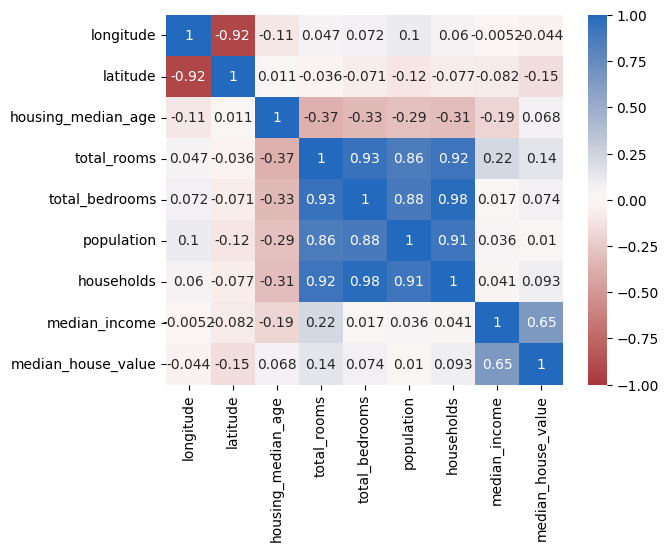

In [89]:
sns.heatmap(data.corr(), annot=True, cmap="vlag_r", vmin=-1, vmax=1)

<Axes: xlabel='total_rooms', ylabel='median_house_value'>

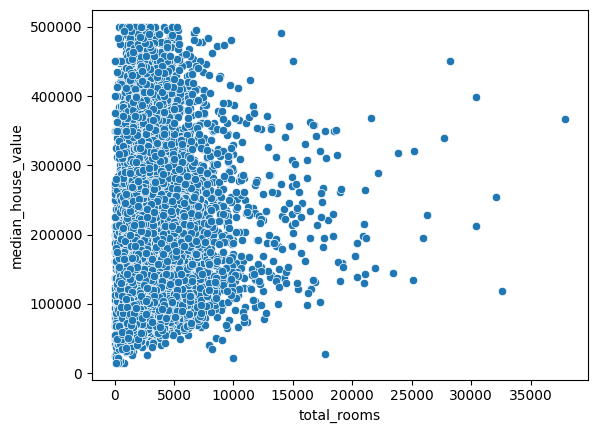

In [90]:
sns.scatterplot(data=data, x="total_rooms", y="median_house_value")

## Data normalization

Apply an affine transformation to the data, so that each feature has zero mean and unitary standard deviation.


In [91]:
data_mean = data.mean()
data_std = data.std()
data_normalized = (data - data_mean) / data_std

data_normalized.describe()
data_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16186 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16186 non-null  float64
 1   latitude            16186 non-null  float64
 2   housing_median_age  16186 non-null  float64
 3   total_rooms         16186 non-null  float64
 4   total_bedrooms      16186 non-null  float64
 5   population          16186 non-null  float64
 6   households          16186 non-null  float64
 7   median_income       16186 non-null  float64
 8   median_house_value  16186 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


<Axes: >

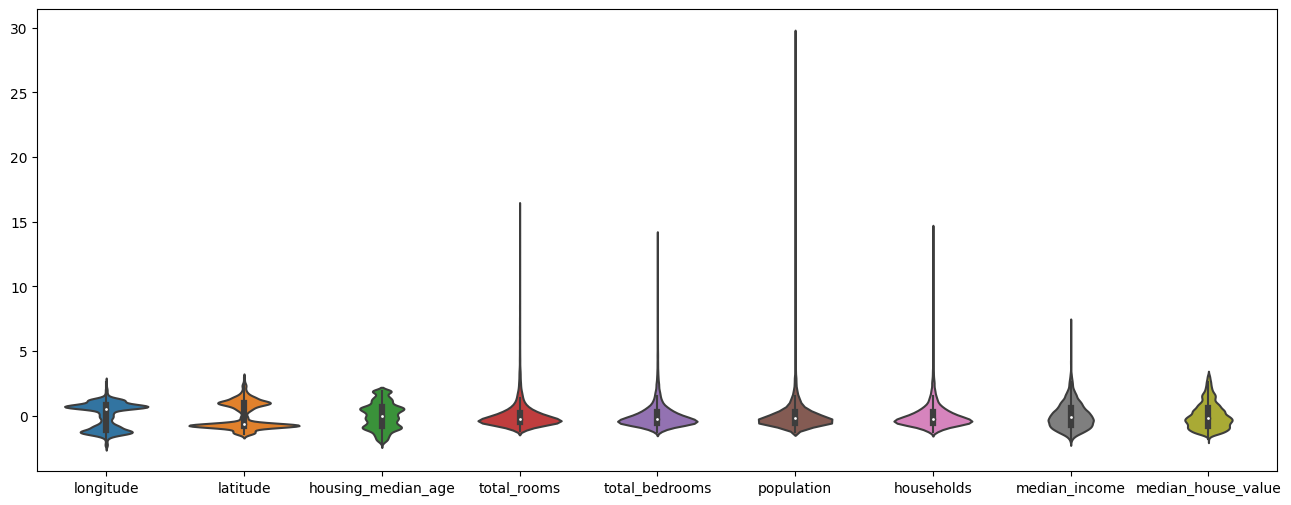

In [92]:
_, ax = plt.subplots(figsize=(16, 6))
sns.violinplot(data=data_normalized, ax=ax)

## Train-validation split

Shuffle the data (**hint:** use the [np.random.shuffle](https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html) function) and split the data as follows:

- put 80% in the train dataset
- put 20% in the validation dataset


In [93]:
np.random.seed(0)  # for reproducibility
data_normalized_np = data_normalized.to_numpy()
# shuffle data
np.random.shuffle(data_normalized_np)

# split data into training and testing
n_samples = data_normalized_np.shape[0]
train_samples = int(n_samples * 0.8)
training_data = data_normalized_np[:train_samples, :-1]
training_y = data_normalized_np[:train_samples, -1:]
test_data = data_normalized_np[train_samples:, :-1]
test_y = data_normalized_np[train_samples:, -1:]

training_data.shape, test_data.shape

((12948, 8), (3238, 8))

## ANN setup

Write a function `initialize_params` that, given the input `layers_size = [n1, n2, ..., nL]`, generates the parameters associated with an ANN, having as many layers as the number of elements of `layers_size`, with as many neurons as `n1`, `n2`, etc.

To initialize the parameters, employ the following strategy:

- Inizialize the biases with zero value.
- Inizialize the weights sampling from a Gaussian distribution with zero mean and with standard deviation
  $$
  \sqrt{\frac{2}{n + m}}
  $$
  where $n$ and $m$ are the number of input and output neurons of the corresponding weights matrix (this is known as "Glorot Normal" or "Xavier Normal", see [Glorot, Bengio 2010](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)).

Other popular initializations strategies are:

- Gaussian distribution with zero mean and with standard deviation (for some constant $K$)
  $$
  \frac{K}{\sqrt{n}}
  $$
- Uniform distribution
  $$
  \left[-\sqrt{\frac{1}{n}}, \sqrt{\frac{1}{n}}\right]
  $$
- Uniform distribution (this is known as "Glorot Uniform" or "Xavier Uniform")
  $$
  \left[-\sqrt{\frac{6}{n + m}}, \sqrt{\frac{6}{n + m}}\right]
  $$


In [94]:
def initialize_params(layers_size):
    np.random.seed(0)  # for reproducibility
    params = list()
    for i in range(len(layers_size) - 1):
        std_dev = np.sqrt(2 / (layers_size[i] + layers_size[i + 1]))
        # append weight matrix of level i
        params.append(np.random.randn(layers_size[i + 1], layers_size[i]) * std_dev)
        # append bias matrix of level i
        params.append(np.zeros((layers_size[i + 1], 1)))

    return params

In [95]:
# layers_size = np.array([10, 9, 5, 4, 3, 1])
# print(layers_size.shape)
# params = initialize_params(layers_size)
# print(len(params))

# weights = params[::2]
# biases = params[1::2]

Implement a generic feedforward ANN with a function `y = ANN(x, params)`, using $\tanh$ as activation function.

By convention, both the input and the output have:

- 1 sample per row
- 1 feature per column


In [96]:
def ANN(x, params):
    n_layers = int(len(params) / 2) + 1
    weights = params[::2]
    biases = params[1::2]

    out_layer = x.T
    for i in range(n_layers - 1):
        out_layer = weights[i] @ out_layer - biases[i]
        if i < n_layers - 2:
            out_layer = jnp.tanh(out_layer)
    return out_layer.T

In [97]:
params = initialize_params([8, 5, 4, 1])
y = ANN(training_data, params)

Implement the quadratic (MSE) loss function `L = loss(x, y, params)`, defined as:

$$
\mathcal{L}(\mathbf{x}, \mathbf{y}, \boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^m (y_i - \mathrm{ANN}(x_i, \boldsymbol{\theta}))^2
$$

where $m$ is the number of samples in $\mathbf{x}$, $\mathbf{y}$ and $\boldsymbol{\theta}$ are the ANN parameters.


In [98]:
def loss(x, y, params):
    return jnp.mean((y - ANN(x, params)) ** 2)

Test your code, by generating the parameters associated with an ANN with two hidden layers with 5 neurons each and by computing the associated loss.


In [99]:
params = initialize_params([8, 5, 5, 1])
y = ANN(training_data, params)
L = loss(training_data, training_y, params)
print(L)

1.0575147


## Training

### Gradient Descent

Implement the GD method:

$$
\begin{split}
& \boldsymbol{\theta}^{(0)} \text{given} \\
& \text{for } k = 0, 1, \dots , n_{\text{epochs}} - 1\\
& \qquad \mathbf{g}^{(k)} = \frac{1}{N} \sum_{i=1}^N \nabla_{\boldsymbol{\theta}} \mathcal{L}(x_i, y_i, \boldsymbol{\theta}^{(k)}) \\
& \qquad \boldsymbol{\theta}^{(k+1)} = \boldsymbol{\theta}^{(k)} - \lambda \mathbf{g}^{(k)}
\end{split}
$$

where $N$ is the number of training samples. At each iteration, append the current cost to the list `history`.

Train an ANN with two hidden layers with 20 neurons each.
Try to (manually) optimize the training hyperparameters.

During training, store the MSE error obtained on the train and validation sets in two lists, respectively called `history_train` and `history_valid`. Finally, plot the erros trend and diplay the final values of the errors.


Hints:

- Use `jax.jit` to speedup the evaluation of the loss and of the gradients.
- Use `tqdm` to show a nice progress bar:


In [100]:
from tqdm.notebook import tqdm

for i in tqdm(range(100)):
    # do something ...
    time.sleep(0.02)  # only for testing

  0%|          | 0/100 [00:00<?, ?it/s]

In [101]:
from tqdm.notebook import tqdm


def optimize_params_GD(
    training_inputs,
    training_outputs,
    testing_inputs,
    testing_outputs,
    params,
    learning_rate,
    n_epoch,
):
    tolerance = 1.0e-6

    grad_loss = jax.grad(loss, argnums=2)
    loss_jit = jax.jit(loss)
    grad_loss_jit = jax.jit(grad_loss)

    training_history = [loss_jit(training_inputs, training_outputs, params)]
    testing_history = [loss_jit(testing_inputs, testing_outputs, params)]

    for k in tqdm(range(n_epoch)):
        grad = grad_loss_jit(training_inputs, training_outputs, params)
        norm = np.sum([np.linalg.norm(grad[i]) for i in range(len(grad))])
        if norm < tolerance:
            break
        for i in range(len(grad)):
            params[i] -= learning_rate * grad[i]

        training_history.append(loss_jit(training_inputs, training_outputs, params))
        testing_history.append(loss_jit(testing_inputs, testing_outputs, params))

    print("Epoch reached: %d" % k)
    print("Tolerance achieved: %f" % norm)

    return params, training_history, testing_history

In [102]:
params = initialize_params([8, 20, 20, 1])
params, training_history, testing_history = optimize_params_GD(
    training_data,
    training_y,
    test_data,
    test_y,
    params,
    learning_rate=0.1,
    n_epoch=2000,
)

  0%|          | 0/2000 [00:00<?, ?it/s]

Epoch reached: 1999
Tolerance achieved: 1.026771


In [103]:
print("Training error: %1.2e" % training_history[-1])
print("Testing error: %1.2e" % testing_history[-1])

Training error: 2.75e-01
Testing error: 2.78e-01


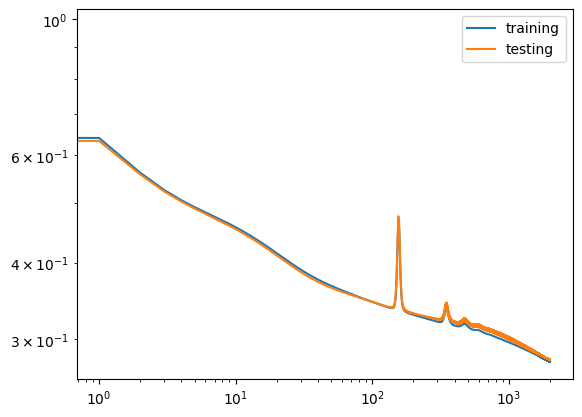

In [104]:
plt.loglog(training_history, label="training")
plt.loglog(testing_history, label="testing")
plt.legend()

### Stochastic Gradient Descent

Implement the SGD method:

$$
\begin{split}
& \boldsymbol{\theta}^{(0)} \text{given} \\
& \text{for } k = 0, 1, \dots , n_{\text{epochs}} - 1\\
& \qquad \mathbf{g}^{(k)} = \frac{1}{|I_k|} \sum_{i \in I_k} \nabla_{\boldsymbol{\theta}} \mathcal{L}(x_i, y_i, \boldsymbol{\theta}^{(k)}) \\
& \qquad \boldsymbol{\theta}^{(k+1)} = \boldsymbol{\theta}^{(k)} - \lambda_k \mathbf{g}^{(k)}
\end{split}
$$

where $I_k$ is the current minibatch. To select it, use the function [np.random.choice](https://docs.scipy.org/doc//numpy-1.10.4/reference/generated/numpy.random.choice.html) with replacement.

Consider a linear decay of the learning rate:

$$
\lambda_k = \max\left(\lambda_{\min}, \lambda_{\max} \left(1 - \frac{k}{K}\right)\right)
$$

Test different choices of batch size and try to optimize the learning rate decay strategy.


In [105]:
def optimize_params_SGD(
    training_inputs,
    training_outputs,
    testing_inputs,
    testing_outputs,
    params,
    minibatch_size,
    learning_rate_max,
    learning_rate_min,
    learning_rate_decay,  # this is the K
    n_epoch,
):
    grad_loss = jax.grad(loss, argnums=2)
    loss_jit = jax.jit(loss)
    grad_loss_jit = jax.jit(grad_loss)

    training_history = [loss_jit(training_inputs, training_outputs, params)]
    testing_history = [loss_jit(testing_inputs, testing_outputs, params)]

    for k in tqdm(range(n_epoch)):
        learning_rate = max(
            learning_rate_min, learning_rate_max * (1 - k / learning_rate_decay)
        )
        minibatch_idx = np.random.choice(training_data.shape[0], minibatch_size)
        grad = grad_loss_jit(
            training_inputs[minibatch_idx, :],
            training_outputs[minibatch_idx, :],
            params,
        )
        for i in range(len(grad)):
            params[i] -= learning_rate * grad[i]

        training_history.append(loss_jit(training_inputs, training_outputs, params))
        testing_history.append(loss_jit(testing_inputs, testing_outputs, params))

    print("Epoch reached: %d" % k)

    return params, training_history, testing_history

In [106]:
params = initialize_params([8, 20, 20, 1])
params, training_history, testing_history = optimize_params_SGD(
    training_data,
    training_y,
    test_data,
    test_y,
    params,
    minibatch_size=1000,
    learning_rate_max=0.2,
    learning_rate_min=0.05,
    learning_rate_decay=2000,
    n_epoch=2000,
)

  0%|          | 0/2000 [00:00<?, ?it/s]

Epoch reached: 1999


In [107]:
print("Training error: %1.2e" % training_history[-1])
print("Testing error: %1.2e" % testing_history[-1])

Training error: 2.75e-01
Testing error: 2.76e-01


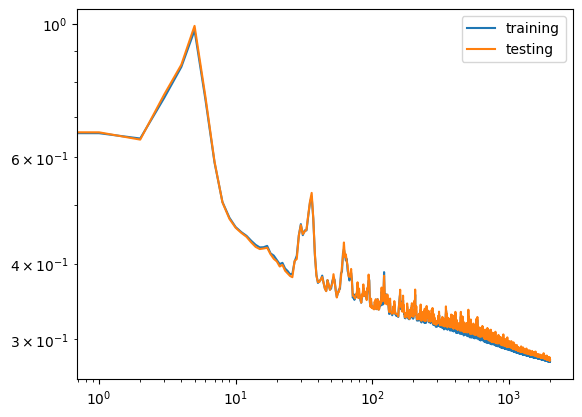

In [108]:
plt.loglog(training_history, label="training")
plt.loglog(testing_history, label="testing")
plt.legend()

## Testing

Load the test dataset `sample_data/california_housing_test.csv` and use the trained model to predict the house prices of the dataset.

Compare predicted prices with actual prices by means of a scatterplot.

Finally, compute the RMSE (root mean square error).


In [109]:
test = pd.read_csv("california_housing_test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


/tmp/ipykernel_4966/3125486024.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test["median_house_value"])


<Axes: xlabel='median_house_value', ylabel='Density'>

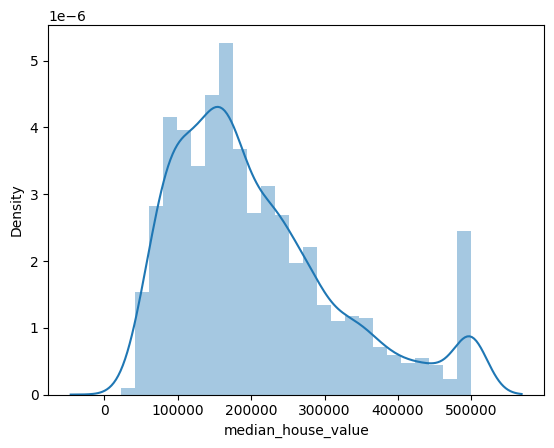

In [110]:
sns.distplot(test["median_house_value"])

/tmp/ipykernel_4966/753443494.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test["median_house_value"])


<Axes: xlabel='median_house_value', ylabel='Density'>

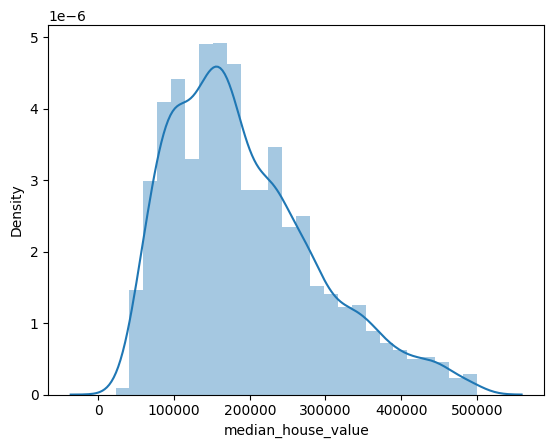

In [111]:
test = test[test["median_house_value"] < 500001]
sns.distplot(test["median_house_value"])

<Axes: xlabel='longitude', ylabel='latitude'>

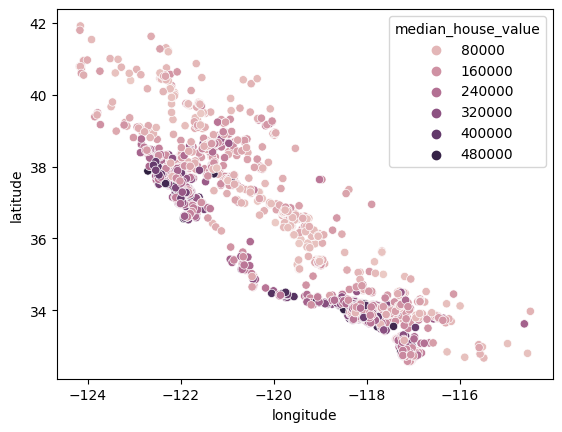

In [112]:
sns.scatterplot(data=test, x="longitude", y="latitude", hue="median_house_value")

In [113]:
test_normalized = (test - data_mean) / data_std
test_normalized.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,2875.000000,2875.000000,2875.000000,2875.000000,2875.000000,2875.000000,2875.000000,2875.000000,2875.000000
mean,-0.015887,0.005446,0.027133,-0.025819,-0.031510,-0.029978,-0.038223,-0.029903,0.004858
std,0.995477,0.995609,1.002587,0.977948,0.960621,0.891215,0.923381,0.982167,0.990707
min,-2.304210,-1.433695,-2.185414,-1.202079,-1.272901,-1.242169,-1.296064,-1.997231,-1.735584
25%,-1.118608,-0.796949,-0.825937,-0.571319,-0.591328,-0.569838,-0.592935,-0.740700,-0.766160
50%,0.525293,-0.634277,0.053725,-0.247117,-0.247004,-0.235396,-0.238785,-0.170166,-0.195731
75%,0.764406,0.959910,0.693478,0.222803,0.222315,0.264543,0.243323,0.527122,0.572155
max,2.522883,2.916624,1.893017,12.748434,10.592131,9.041052,11.249098,7.176532,3.137045


In [114]:
test_np = test_normalized.to_numpy()
input_test = test_np[:, :-1]
actual_values = test.to_numpy()[:, -1:]
actual_values.shape

(2875, 1)

In [115]:
predicted_values = ANN(input_test, params)
predicted_values = (
    predicted_values * data["median_house_value"].std()
    + data["median_house_value"].mean()
)
predicted_values.shape

(2875, 1)

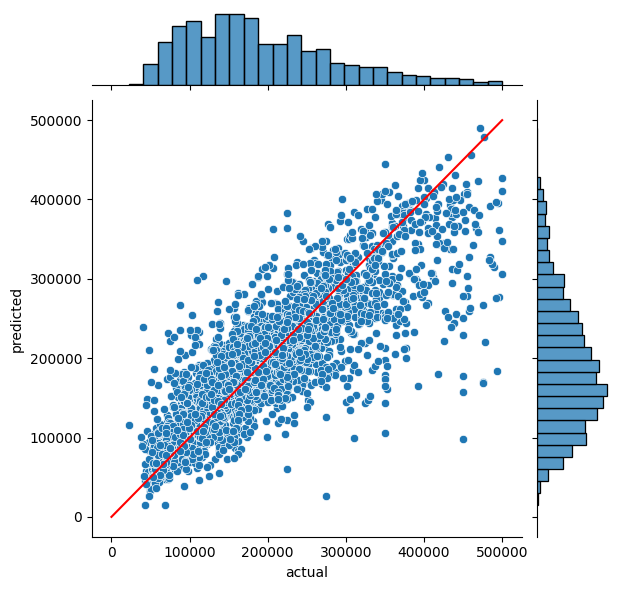

In [116]:
test_pd = pd.DataFrame(
    {"predicted": predicted_values[:, 0], "actual": actual_values[:, 0]}
)

fig = sns.jointplot(data=test_pd, x="actual", y="predicted")
fig.ax_joint.plot([0, 500000], [0, 500000.0], "r")

In [117]:
error = predicted_values - actual_values
RMSE = jnp.sqrt(jnp.mean(error * error))
print("RMSE: %0.2f k$" % (RMSE * 1e-3))

RMSE: 53.14 k$
